# Lab 12 - Combining Multiple Learners - Decision Tree

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.tree as tree

### Importing Data

In [2]:
training_digits = np.genfromtxt("mnist_training_digits.csv", delimiter = ",")
training_labels = np.genfromtxt("mnist_training_labels.csv", delimiter = ",")
test_digits = np.genfromtxt("mnist_test_digits.csv", delimiter = ",")
test_labels = np.genfromtxt("mnist_test_labels.csv", delimiter = ",")

X_train = training_digits / 255
y_train = training_labels.astype(int)
X_test = test_digits / 255
y_test = test_labels.astype(int)
K = np.max(y_train)
D = X_train.shape[1]

### Construct an Ensemble by Training Decision Trees on Feature Subsets

In [3]:
np.random.seed(421)
ensemble_size = 100
feature_subset_size = 75
N_test = X_test.shape[0]

predicted_probabilities = np.zeros((N_test, K, ensemble_size))
for t in range(ensemble_size):
    print("training decision tree #{0}".format(t + 1))
    selected_features = np.random.choice(range(D), size = feature_subset_size, replace = False)
    tree_model = tree.DecisionTreeClassifier().fit(X_train[:, selected_features], y_train)
    predicted_probabilities[:, :, t] = tree_model.predict_proba(X_test[:, selected_features])

training decision tree #1
training decision tree #2
training decision tree #3
training decision tree #4
training decision tree #5
training decision tree #6
training decision tree #7
training decision tree #8
training decision tree #9
training decision tree #10
training decision tree #11
training decision tree #12
training decision tree #13
training decision tree #14
training decision tree #15
training decision tree #16
training decision tree #17
training decision tree #18
training decision tree #19
training decision tree #20
training decision tree #21
training decision tree #22
training decision tree #23
training decision tree #24
training decision tree #25
training decision tree #26
training decision tree #27
training decision tree #28
training decision tree #29
training decision tree #30
training decision tree #31
training decision tree #32
training decision tree #33
training decision tree #34
training decision tree #35
training decision tree #36
training decision tree #37
training d

In [4]:
single_accuracies = np.zeros(ensemble_size)
combined_accuracies = np.zeros(ensemble_size)
for t in range(ensemble_size):
    y_predicted = np.argmax(predicted_probabilities[:, :, t], axis = 1) + 1
    single_accuracies[t] = np.mean(y_predicted == y_test)
    prediction = np.mean(predicted_probabilities[:, :, range(t + 1)], axis = 2)
    y_predicted = np.argmax(prediction, axis = 1) + 1
    combined_accuracies[t] = np.mean(y_predicted == y_test)

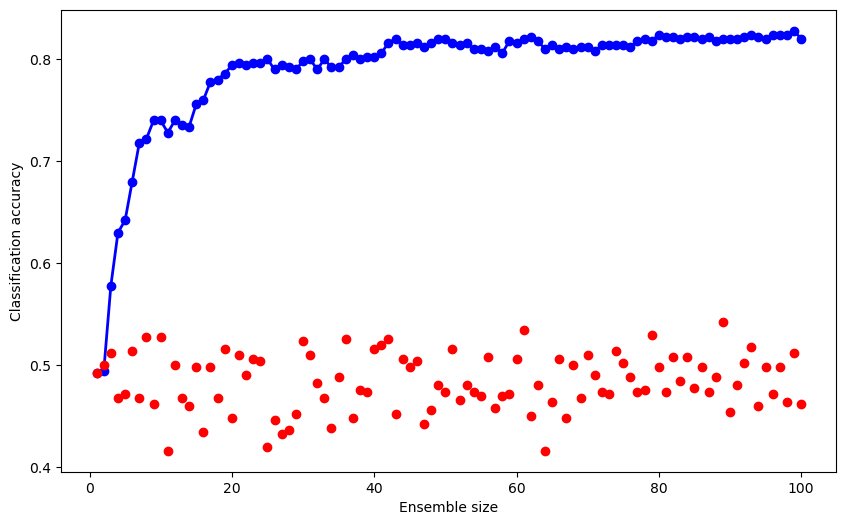

In [5]:
plt.figure(figsize = (10, 6))
plt.plot(np.arange(1, ensemble_size + 1), combined_accuracies, marker = "o", color = "blue", linewidth = 2)
plt.plot(np.arange(1, ensemble_size + 1), single_accuracies, marker = "o", color = "red", linestyle = "none")
plt.xlabel("Ensemble size")
plt.ylabel("Classification accuracy")
plt.show()

### Construct an Ensemble by Training Decision Trees on Sample Subsets

In [6]:
np.random.seed(421)
ensemble_size = 100
sample_subset_size = 50
N_test = X_test.shape[0]

predicted_probabilities = np.zeros((N_test, K, ensemble_size))
for t in range(ensemble_size):
    print("training decision tree #{0}".format(t + 1))
    selected_samples = np.concatenate([np.random.choice(np.flatnonzero(y_train == c + 1), size = sample_subset_size // K, replace = False) for c in range(K)])
    tree_model = tree.DecisionTreeClassifier().fit(X_train[selected_samples, :], y_train[selected_samples])
    predicted_probabilities[:, :, t] = tree_model.predict_proba(X_test)

training decision tree #1
training decision tree #2
training decision tree #3
training decision tree #4
training decision tree #5
training decision tree #6
training decision tree #7
training decision tree #8
training decision tree #9
training decision tree #10
training decision tree #11
training decision tree #12
training decision tree #13
training decision tree #14
training decision tree #15
training decision tree #16
training decision tree #17
training decision tree #18
training decision tree #19
training decision tree #20
training decision tree #21
training decision tree #22
training decision tree #23
training decision tree #24
training decision tree #25
training decision tree #26
training decision tree #27
training decision tree #28
training decision tree #29
training decision tree #30
training decision tree #31
training decision tree #32
training decision tree #33
training decision tree #34
training decision tree #35
training decision tree #36
training decision tree #37
training d

In [7]:
single_accuracies = np.zeros(ensemble_size)
combined_accuracies = np.zeros(ensemble_size)
for t in range(ensemble_size):
    y_predicted = np.argmax(predicted_probabilities[:, :, t], axis = 1) + 1
    single_accuracies[t] = np.mean(y_predicted == y_test)
    prediction = np.mean(predicted_probabilities[:, :, range(t + 1)], axis = 2)
    y_predicted = np.argmax(prediction, axis = 1) + 1
    combined_accuracies[t] = np.mean(y_predicted == y_test)

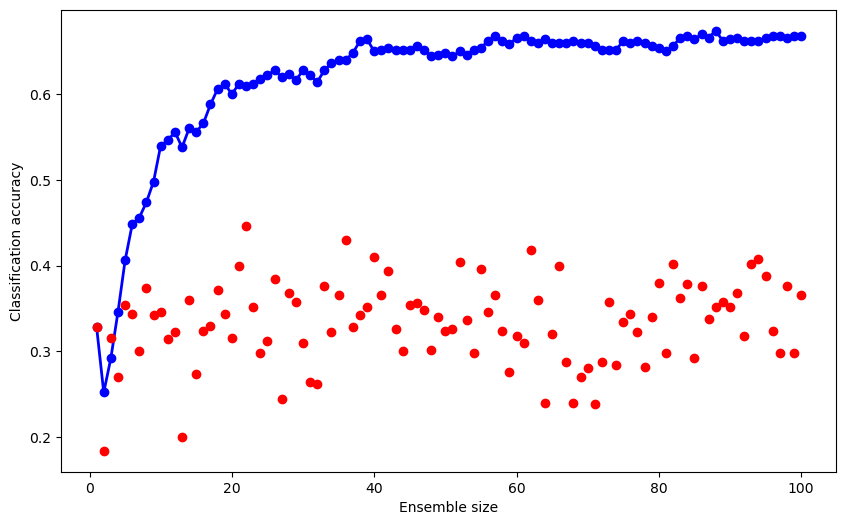

In [8]:
plt.figure(figsize = (10, 6))
plt.plot(np.arange(1, ensemble_size + 1), combined_accuracies, marker = "o", color = "blue", linewidth = 2)
plt.plot(np.arange(1, ensemble_size + 1), single_accuracies, marker = "o", color = "red", linestyle = "none")
plt.xlabel("Ensemble size")
plt.ylabel("Classification accuracy")
plt.show()